## Challenge
Récupère les données depuis l'API REST suivante.

La documentation de l'API est disponible ici.

Affiche un DataFrame avec l'adresse de chaque station, et le taux de remplissage associé (c'est-à-dire le nombre de vélos disponibles available_bikes / le nombre d'emplacement total bike_stands).

Résultat attendu (les taux de remplissage seront différents, car les données sont générées en temps réel) :



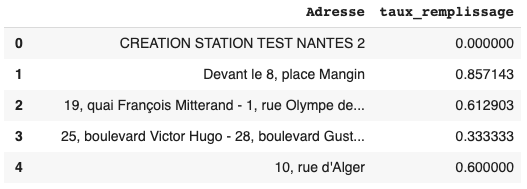

In [1]:
import pandas as pd
import requests
import json


In [ ]:
# Charger les données JSON directement, sans utiliser pandas pour vérifier la structure
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Afficher le type de la structure de données chargée pour confirmer sa structure
type(json_data), json_data[0] if isinstance(json_data, list) else json_data


In [14]:
# Nous avons confirmé que la liste des enregistrements est sous la clé 'liste_velo_nantes'.
# Extrayons cette liste et créons un DataFrame.
liste_velo_nantes = json_data['records']
df_liste_velo_nantes = pd.DataFrame.from_records(liste_velo_nantes)
df_liste_velo_nantes.head(5)


,datasetid,recordid,fields,geometry
0,244400404_stations-velos-libre-service-nantes-...,b9c525140686b39745666bbe41512644570a8a72,"{'available_bike_stands': 0, 'bike_stands': 0,...","{'type': 'Point', 'coordinates': [-1.5575, 47...."
1,244400404_stations-velos-libre-service-nantes-...,382ee2b083264e50cbc32e0edbd93de920f4bbbd,"{'available_bike_stands': 6, 'bike_stands': 7,...","{'type': 'Point', 'coordinates': [-1.557559, 4..."
2,244400404_stations-velos-libre-service-nantes-...,ccd1d4fde29a9d57536b5a3975f1c3ca680f311d,"{'available_bike_stands': 14, 'bike_stands': 2...","{'type': 'Point', 'coordinates': [-1.569362, 4..."
3,244400404_stations-velos-libre-service-nantes-...,fb8e90dc65d5439215542a3ed7debf159701af88,"{'available_bike_stands': 17, 'bike_stands': 2...","{'type': 'Point', 'coordinates': [-1.553484290..."
4,244400404_stations-velos-libre-service-nantes-...,501375163679b22a2e0411358fe2d8b47d45695e,"{'available_bike_stands': 16, 'bike_stands': 3...","{'type': 'Point', 'coordinates': [-1.556126125..."


In [19]:
# Chaque enregistrement a des champs dans une clé 'fields', donc nous devons normaliser cette structure.
df_borne_velos = pd.json_normalize(df_liste_velo_nantes['fields'])
df_borne_velos


,available_bike_stands,bike_stands,number,address,name,bonus,banking,contract_name,status,available_bikes,position,last_update
0,0,0,1011,Borne test 1,01011 - BORNE TEST NANTES 1,False,False,nantes,OPEN,0,"[47.19504, -1.5575]",2022-05-23T14:41:50+00:00
1,6,7,1012,CREATION STATION TEST NANTES 2,01012 - BORNE TEST NANTES 2,False,False,nantes,OPEN,0,"[47.195299, -1.557559]",2023-08-30T06:54:12+00:00
2,14,21,113,Place Jean-Baptiste Daviais - REZÉ,113-MAIRIE DE REZÉ,False,False,nantes,OPEN,7,"[47.191117, -1.569362]",2024-02-06T17:05:23+00:00
3,17,20,2,"29, rue de Strasbourg",002-HÔTEL DE VILLE,False,False,nantes,OPEN,3,"[47.2185718130915, -1.55348429039295]",2024-02-06T17:08:07+00:00
4,16,30,7,"2, allée Penthièvre",007-BARILLERIE,False,True,nantes,OPEN,14,"[47.2153313580104, -1.55612612597517]",2024-02-06T17:07:53+00:00
5,20,24,8,"4, rue de la Boucherie",008-BOUCHERIE,False,True,nantes,OPEN,4,"[47.2162008925882, -1.55711168019757]",2024-02-06T17:08:56+00:00
6,8,13,73,"4, place Emile Sarradin",073-SARRADIN,False,False,nantes,OPEN,5,"[47.2208824330189, -1.57043859807393]",2024-02-06T17:08:05+00:00
7,8,15,52,"8, allée Baco",052-BACO,False,False,nantes,OPEN,7,"[47.2143275245891, -1.54875055574198]",2024-02-06T17:09:13+00:00
8,9,28,101,"13, rue Esnoul des Châtelets",101-PIRMIL,False,True,nantes,OPEN,19,"[47.1965313642396, -1.54156809120326]",2024-02-06T17:08:42+00:00
9,11,15,36,"10, rue d'Alger",036-ALGER,False,False,nantes,OPEN,4,"[47.210549, -1.567368]",2024-02-06T17:07:37+00:00


In [20]:
from tabulate import tabulate

# Afficher le DataFrame sous forme de tableau
print(tabulate(df_result, headers='keys', tablefmt='psql'))


+----+------------------------------------+----------------+
|    | address                            |   filling_rate |
|----+------------------------------------+----------------|
|  0 | Borne test 1                       |     nan        |
|  1 | CREATION STATION TEST NANTES 2     |       0        |
|  2 | Place Jean-Baptiste Daviais - REZÉ |       0.333333 |
|  3 | 29, rue de Strasbourg              |       0.15     |
|  4 | 2, allée Penthièvre                |       0.466667 |
|  5 | 4, rue de la Boucherie             |       0.166667 |
|  6 | 4, place Emile Sarradin            |       0.384615 |
|  7 | 8, allée Baco                      |       0.466667 |
|  8 | 13, rue Esnoul des Châtelets       |       0.678571 |
|  9 | 10, rue d'Alger                    |       0.266667 |
+----+------------------------------------+----------------+


In [18]:
# Calcul du taux de remplissage pour chaque station.
df_borne_velos['filling_rate'] = df_borne_velos['available_bikes'] / \
    df_borne_velos['bike_stands']

# Sélection des colonnes  adresse et taux de remplissage.
df_result = df_borne_velos[['address', 'filling_rate']]

df_result.head(5)


,address,filling_rate
0,Borne test 1,NaN
1,CREATION STATION TEST NANTES 2,0.000000
2,Place Jean-Baptiste Daviais - REZÉ,0.333333
3,"29, rue de Strasbourg",0.150000
4,"2, allée Penthièvre",0.466667


In [ ]:
# url = '/api/explore/v2.1/catalog/datasets/244400404_stations-velos-libre-service-nantes-metropole-disponibilites/liste_velo_nantes?limit=20'
# requests.get(url).text

# data=json.loads(requests.get(url).text)

# pd.DataFrame(data).value_counts()

# pd.DataFrame(data).prenoms.value_counts()
